In [51]:
# https://youtu.be/Hax03rCn3UI

# TensorFlow로 간단한 linear regression을 구현

## Hypothesis and cost Function
주어진 x값에 대해서 예측을 어떻게 할 것-> hypothesis 

Hypothesis는 이런 일차방정식일 것이라고 가설을 세운다. 
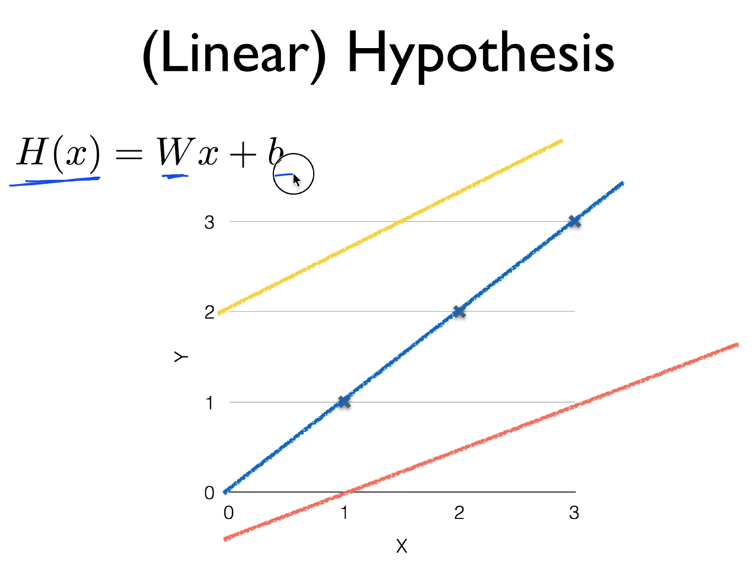

 어떤 선이 우리와 가장 맞는 선(가장 좋은 값)인지 알아낼 수 있어야 한다. 
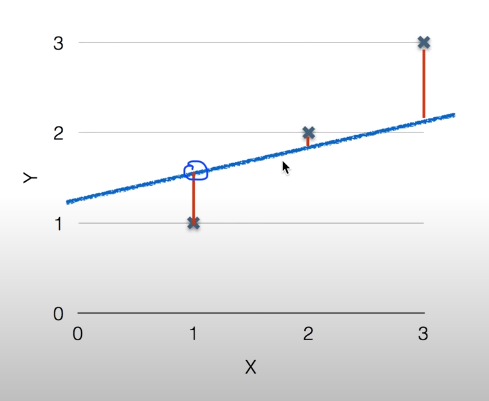

실제 데이터(점)와 이 가설이 나타내는 선의 거리가 가까우면 가설과 일치 
<p></p>
-> Cost function 가설과 데이터가 얼마나 다른가를 확인하는 것.
(H(x)-y)^2 일정하게 차이를 양수로 표현, 차이가 클 때 더 커짐. m은 데이터 개수라고 볼 수 있다.

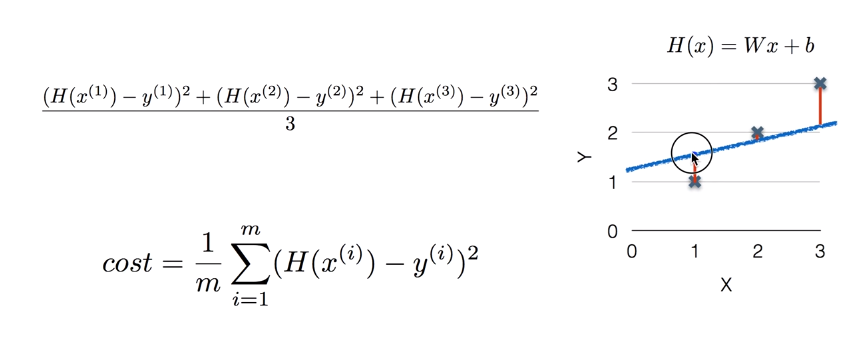

----
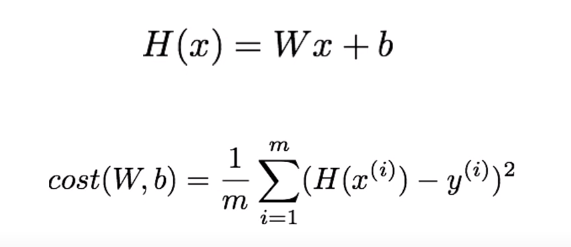

In [52]:
import tensorflow.compat.v1 as tf
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# variable 텐서플로우가 사용하는 것이다. 텐서플로우가 자체적으로 실행시키는 값이다. 
# trainable value이다. 학습하는 과정에서 자기가 변경시킨다. 
W = tf.Variable(tf.random.normal([1]), name='weight') #[1]: shape 
b = tf.Variable(tf.random.normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/lost function 
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

## reduce_mean

평균 내주는 것
t = [1., 2., 3., 4.]
tf.reduce_mean(t) == 2.5

In [30]:
t = [1., 2., 3., 4.]
tf.reduce_mean(t) == 2.5
print(tf.reduce_mean(t))

Tensor("Mean_1:0", shape=(), dtype=float32)


In [53]:
import tensorflow.compat.v1 as tf
 
with tf.compat.v1.Session() as sess:
    x_train = [1,2,3]
    y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x_train * W + b
cost = tf.reduce_mean(tf.square(hypothesis - y_train))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)


#세션 만들기 W, b 사용하기 전에는 
#tf.global_variables_initializer() 사용해야한다. 
sess = tf.Session()
#sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))
                                    #1로 수렴     #0에 가까운 수로 수렴

#optimizer를 실행시키면, train 이 일어나서 tensorflow가 조종하게 된다. 

0 19.513075 [-0.65434927] [-0.8970705]
20 0.1795155 [0.896006] [-0.20710911]
40 0.0039853607 [1.041114] [-0.13569248]
60 0.0021774902 [1.0525333] [-0.12344201]
80 0.0019645572 [1.0513359] [-0.11708143]
100 0.0017841227 [1.0490443] [-0.1115258]
120 0.0016203619 [1.0467509] [-0.10627939]
140 0.0014716418 [1.044555] [-0.10128416]
160 0.0013365684 [1.0424613] [-0.09652417]
180 0.0012138947 [1.0404657] [-0.091988]
200 0.0011024816 [1.0385638] [-0.08766489]
220 0.0010012886 [1.0367515] [-0.08354492]
240 0.0009093873 [1.0350244] [-0.07961863]
260 0.0008259203 [1.0333784] [-0.07587686]
280 0.0007501122 [1.0318097] [-0.07231093]
300 0.0006812646 [1.0303148] [-0.06891261]
320 0.00061873713 [1.0288901] [-0.06567397]
340 0.0005619469 [1.0275323] [-0.06258756]
360 0.0005103692 [1.0262384] [-0.05964617]
380 0.00046352542 [1.0250053] [-0.05684301]
400 0.00042098144 [1.0238302] [-0.05417162]
420 0.00038234275 [1.0227103] [-0.05162577]
440 0.00034724965 [1.0216429] [-0.04919958]
460 0.00031538054 [1.02

## Placeholder
직접 값을 주지 않고, 필요할 때 값을 던져준다. 
placeholder를 사용해서, 실행시켜볼 수 있다.

## placeholder를 사용하는 이유
우리가 이미 만들어진 모델에 값을 따로 넘겨줄 수 있다. 기존 X, Y를 직접 주는 대신 placeholder와 shape=[None]으로 사용할 수 있다. 

In [54]:
# import tensorflow.compat.v1 as tf

# X and Y data
# x_train = [1, 2, 3]
# y_train = [1, 2, 3]


# Now we can use X and Y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Fit the line 
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train], #리스트에 넣어 한꺼번에 수행 가능. 
                 feed_dict = {X:[1, 2, 3, 4, 5], Y:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
                 print(step, cost_val, W_val, b_val)
                # print(sess.run(hypothesis, feed_dict = {X:[2.5]}))

0 1.9090369e-07 [1.0005065] [-0.00115081]
20 1.7344458e-07 [1.0004827] [-0.00109696]
40 1.5759174e-07 [1.0004601] [-0.00104543]
60 1.4321965e-07 [1.0004387] [-0.00099658]
80 1.3004397e-07 [1.0004178] [-0.00094979]
100 1.18183216e-07 [1.0003986] [-0.00090534]
120 1.0734874e-07 [1.0003796] [-0.00086297]
140 9.7516505e-08 [1.000362] [-0.00082242]
160 8.861206e-08 [1.0003452] [-0.00078402]
180 8.046671e-08 [1.0003285] [-0.00074728]
200 7.3122514e-08 [1.0003135] [-0.00071216]
220 6.646073e-08 [1.0002991] [-0.00067896]
240 6.038203e-08 [1.0002848] [-0.00064728]
260 5.4843117e-08 [1.0002713] [-0.0006168]
280 4.9857274e-08 [1.0002589] [-0.00058793]
300 4.5339107e-08 [1.000247] [-0.00056061]
320 4.1186397e-08 [1.0002351] [-0.00053444]
340 3.7362437e-08 [1.000224] [-0.00050922]
360 3.397967e-08 [1.0002137] [-0.00048536]
380 3.087771e-08 [1.000204] [-0.00046278]
400 2.8076402e-08 [1.0001944] [-0.00044132]
420 2.5490445e-08 [1.0001849] [-0.00042064]
440 2.3148514e-08 [1.0001762] [-0.00040075]
460 